# Explore here

In [5]:
# Your code 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import FunctionTransformer
import joblib


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(df.shape)
df.head().T

(41188, 21)


,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:
duplicados = df.duplicated().sum()


In [10]:
df = df.drop_duplicates()
print(f"Nuevo número de filas: {len(df)}")

Nuevo número de filas: 41176


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41176.00,258.32,259.31,0.00,102.00,180.00,319.00,4918.00
campaign,41176.00,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41176.00,962.46,186.94,0.00,999.00,999.00,999.00,999.00
previous,41176.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41176.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41176.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41176.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41176.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41176.00,5167.03,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


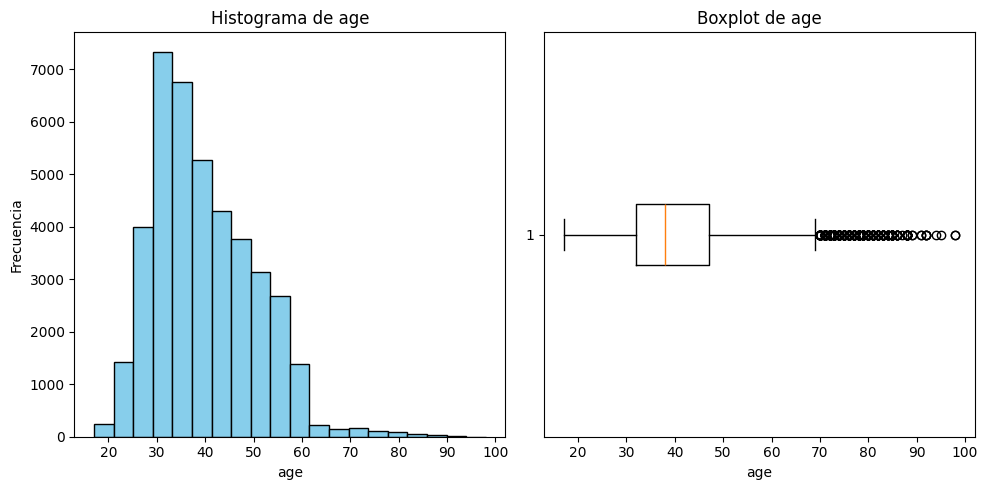

In [12]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de age')
ax[0].set_xlabel('age')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['age'], vert=False)
ax[1].set_title('Boxplot de age')
ax[1].set_xlabel('age')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [13]:
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

In [14]:
df.drop(["default", "day_of_week", "month", "poutcome"], axis = 1, inplace = True)
df.head()


,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no


In [15]:
df.drop(["education","housing","loan"],axis =1, inplace = True)
df.head()


,age,job,marital,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,telephone,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,telephone,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,telephone,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,telephone,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,telephone,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no


In [16]:
df_clean=df

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   contact         41176 non-null  object 
 4   duration        41176 non-null  int64  
 5   campaign        41176 non-null  int64  
 6   pdays           41176 non-null  int64  
 7   previous        41176 non-null  int64  
 8   emp.var.rate    41176 non-null  float64
 9   cons.price.idx  41176 non-null  float64
 10  cons.conf.idx   41176 non-null  float64
 11  euribor3m       41176 non-null  float64
 12  nr.employed     41176 non-null  float64
 13  y               41176 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 4.7+ MB


In [18]:
encoder = LabelEncoder()
encoder.fit(sorted(df_clean['job'].unique()))
df_clean ['job_int'] = encoder.transform (df['job'])
encoder = LabelEncoder()

encoder.fit(sorted(df_clean['marital'].unique()))
df_clean ['marital_int'] = encoder.transform (df['marital'])

encoder.fit(sorted(df_clean['contact'].unique()))
df_clean ['contact_int'] = encoder.transform (df['contact'])

encoder.fit(sorted(df_clean['y'].unique()))
df_clean ['y_int'] = encoder.transform (df['y'])

In [19]:
df_clean.drop(['job','marital','contact','y'], axis=1, inplace= True)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   campaign        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp.var.rate    41176 non-null  float64
 6   cons.price.idx  41176 non-null  float64
 7   cons.conf.idx   41176 non-null  float64
 8   euribor3m       41176 non-null  float64
 9   nr.employed     41176 non-null  float64
 10  job_int         41176 non-null  int64  
 11  marital_int     41176 non-null  int64  
 12  contact_int     41176 non-null  int64  
 13  y_int           41176 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 4.7 MB


In [21]:
# Separamos las variables independientes de la dependiente
X = df.drop(['contact_int','y_int'], axis=1)
y = df['y_int']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

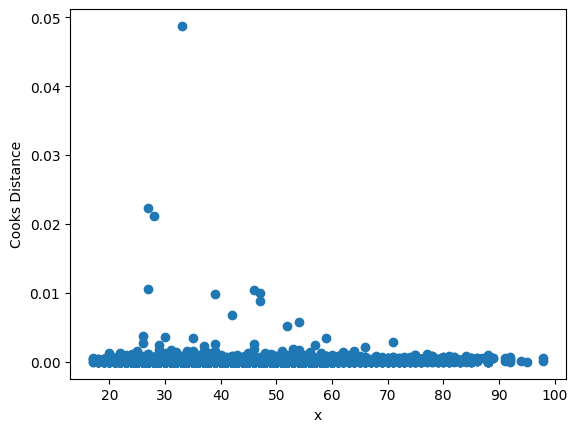

In [22]:
plt.scatter(df_clean.age, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df_clean)

# por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

5359

In [24]:
np.where(cooks_distance[0]>0.04)

(array([24084]),)

In [25]:
df_clean.iloc[24084,]

age                33.00
duration         4918.00
campaign            1.00
pdays             999.00
previous            0.00
emp.var.rate       -0.10
cons.price.idx     93.20
cons.conf.idx     -42.00
euribor3m           4.41
nr.employed      5195.80
job_int             9.00
marital_int         2.00
contact_int         1.00
y_int               0.00
Name: 24091, dtype: float64

In [27]:
cooks_distance = np.atleast_1d(cooks_distance)

# Drop rows where Cook's distance exceeds the threshold (pto_corte)
df1 = df_clean.drop(np.where(cooks_distance > pto_corte)[0])

# Display the result
df1.duplicated().sum()

np.int64(39)

In [28]:
df1 = df1.drop_duplicates()
df1.duplicated().sum()

np.int64(0)

In [29]:
# Separamos las variables independientes de la dependiente
X = df1.drop(['age','y_int'], axis=1)
y = df1['y_int']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
8,nr.employed,75.67
0,duration,5.13
6,cons.conf.idx,3.09
2,pdays,2.85
5,cons.price.idx,2.37
7,euribor3m,2.16
11,contact_int,2.07
9,job_int,1.57
1,campaign,1.35
10,marital_int,1.33


In [32]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['nr.employed', 'duration', 'cons.conf.idx', 'pdays',
       'cons.price.idx', 'euribor3m', 'contact_int', 'job_int',
       'campaign', 'marital_int', 'previous', 'emp.var.rate'],
      dtype=object)

In [33]:
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

In [34]:
X_train.corr()

,nr.employed,duration,cons.conf.idx,pdays,cons.price.idx,euribor3m,contact_int,job_int,campaign,marital_int,previous,emp.var.rate
nr.employed,1.00,-0.04,0.10,0.37,0.52,0.94,0.27,-0.02,0.14,-0.08,-0.50,0.91
duration,-0.04,1.00,-0.01,-0.05,0.00,-0.03,-0.03,-0.01,-0.07,0.01,0.02,-0.03
cons.conf.idx,0.10,-0.01,1.00,-0.09,0.06,0.28,0.25,0.05,-0.02,-0.03,-0.05,0.20
pdays,0.37,-0.05,-0.09,1.00,0.07,0.30,0.12,-0.03,0.05,-0.04,-0.59,0.27
cons.price.idx,0.52,0.00,0.06,0.07,1.00,0.69,0.59,-0.02,0.13,-0.06,-0.20,0.77
euribor3m,0.94,-0.03,0.28,0.30,0.69,1.00,0.40,-0.01,0.13,-0.09,-0.45,0.97
contact_int,0.27,-0.03,0.25,0.12,0.59,0.40,1.00,-0.03,0.07,-0.05,-0.21,0.40
job_int,-0.02,-0.01,0.05,-0.03,-0.02,-0.01,-0.03,1.00,-0.02,0.03,0.02,-0.01
campaign,0.14,-0.07,-0.02,0.05,0.13,0.13,0.07,-0.02,1.00,-0.01,-0.08,0.15
marital_int,-0.08,0.01,-0.03,-0.04,-0.06,-0.09,-0.05,0.03,-0.01,1.00,0.04,-0.08


In [37]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif


nr.employed       8298.96
duration             1.08
cons.conf.idx      172.09
pdays                6.20
cons.price.idx    1054.70
euribor3m        23418.68
contact_int         43.08
job_int              1.05
campaign             2.04
marital_int          1.10
previous             9.26
emp.var.rate      8637.11
dtype: float64

<Axes: >

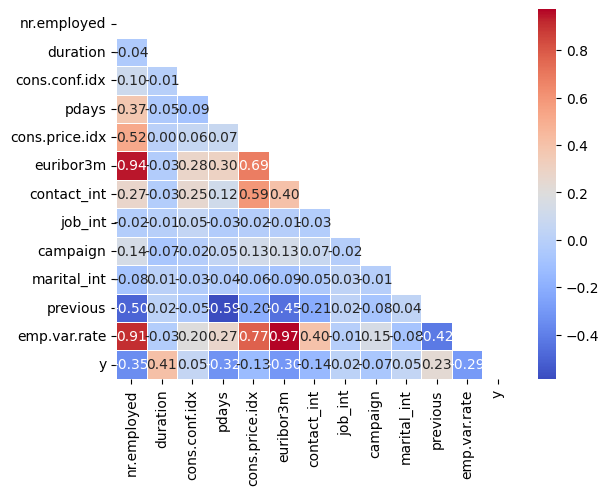

In [38]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [39]:
X_train['AREA'] = X_train['nr.employed']*X_train['euribor3m']
X_test['AREA'] = X_test['nr.employed']*X_test['euribor3m']

In [40]:
X_train.drop(['nr.employed', 'pdays', 'euribor3m'], axis=1, inplace=True)
X_test.drop(['nr.employed', 'pdays', 'euribor3m'], axis=1, inplace=True)

In [41]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

duration            1.06
cons.conf.idx       7.45
cons.price.idx    362.39
contact_int        36.34
job_int             1.04
campaign            1.39
marital_int         1.08
previous            4.27
emp.var.rate     7371.67
AREA             5491.98
dtype: float64

In [42]:
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols


Index(['contact_int'], dtype='object')

In [44]:
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [45]:
scaler = MinMaxScaler().fit(X_train_num)

In [46]:
X_ẗrain_num_sc = scaler.transform(X_train_num)
X_ẗest_num_sc = scaler.transform(X_test_num)

In [47]:
X_train_sc = pd.concat([pd.DataFrame(X_ẗrain_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_ẗest_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [48]:
X_train_sc

,duration,cons.conf.idx,cons.price.idx,job_int,campaign,marital_int,previous,emp.var.rate,AREA,contact_int
0,0.05,1.00,0.09,0.73,0.00,0.67,0.00,0.00,0.02,0
1,0.02,0.62,0.48,0.00,0.02,0.67,0.00,1.00,0.99,0
2,0.04,0.60,0.70,0.64,0.00,0.33,0.00,0.94,0.96,1
3,0.07,0.19,0.27,0.09,0.00,0.33,0.17,0.33,0.15,0
4,0.01,0.19,0.27,0.82,0.02,0.67,0.17,0.33,0.14,0
...,...,...,...,...,...,...,...,...,...,...
32903,0.06,0.60,0.70,0.00,0.02,0.33,0.00,0.94,0.96,1
32904,0.01,0.38,0.88,0.36,0.00,0.67,0.00,1.00,0.99,1
32905,0.02,1.00,0.09,0.00,0.00,0.33,0.00,0.00,0.02,0
32906,0.02,0.60,0.70,0.82,0.00,0.33,0.00,0.94,0.96,1


In [49]:
# Instanciamos el estimador
estimator = ExtraTreesRegressor()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....................max_depth=90, n_estimators=250; total time=   7.5s
[CV] END .....................max_depth=90, n_estimators=250; total time=   7.5s
[CV] END .....................max_depth=90, n_estimators=250; total time=   7.4s
[CV] END .....................max_depth=90, n_estimators=250; total time=   7.9s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.5s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.6s
[CV] END ......................max_depth=40, n_estimators=50; total time=   2.4s
[CV] END ......................max_depth=40, n_estimators=50; total time=   3.2s
[CV] END .....................max_depth=90, n_estimators=250; total time=  10.0s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.8s
[CV] END .....................max_depth=70, n_estimators=100; total time=   3.1s
[CV] END .....................max_depth=70, n_est

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [50]:
random_search.best_score_

np.float64(-0.2577093859329859)

In [51]:
random_search.best_params_

{'n_estimators': 250, 'max_depth': np.int64(90)}

In [52]:
random_search.best_estimator_

ExtraTreesRegressor(max_depth=np.int64(90), n_estimators=250)

In [53]:
param_dist = {'n_estimators':[240,250,270], 'max_depth':[90,110]}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....max_depth=90, n_estimators=240;, score=0.346 total time=   5.5s
[CV 2/5] END ....max_depth=90, n_estimators=240;, score=0.328 total time=   5.4s
[CV 3/5] END ....max_depth=90, n_estimators=240;, score=0.332 total time=   4.9s
[CV 4/5] END ....max_depth=90, n_estimators=240;, score=0.317 total time=   5.0s
[CV 5/5] END ....max_depth=90, n_estimators=240;, score=0.344 total time=   4.8s
[CV 1/5] END ....max_depth=90, n_estimators=250;, score=0.347 total time=   5.0s
[CV 2/5] END ....max_depth=90, n_estimators=250;, score=0.328 total time=   5.1s
[CV 3/5] END ....max_depth=90, n_estimators=250;, score=0.333 total time=   5.1s
[CV 4/5] END ....max_depth=90, n_estimators=250;, score=0.315 total time=   5.2s
[CV 5/5] END ....max_depth=90, n_estimators=250;, score=0.344 total time=   5.1s
[CV 1/5] END ....max_depth=90, n_estimators=270;, score=0.345 total time=   5.6s
[CV 2/5] END ....max_depth=90, n_estimators=270;,

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [90, 110],
                         'n_estimators': [240, 250, 270]},
             verbose=3)

In [54]:
grid_search.best_params_

{'max_depth': 110, 'n_estimators': 250}

In [55]:
y_pred_train = np.exp(grid_search.best_estimator_.predict(X_train_sc))
y_pred_test = np.exp(grid_search.best_estimator_.predict(X_test_sc))
y_train_eu = np.exp(y_train)
y_test_eu = np.exp(y_test)

In [56]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular las métricas para entrenamiento
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100
    r2_train = r2_score(y_train, y_pred_train)

    # Calcular las métricas para test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100
    r2_test = r2_score(y_test, y_pred_test)

    # Calcular las diferencias
    mae_diff = mae_test - mae_train
    mape_diff = mape_test - mape_train
    r2_diff = r2_test - r2_train

    # Crear el DataFrame
    metrics_df = pd.DataFrame({
        'MAE': [mae_train, mae_test, mae_diff],
        'MAPE': [mape_train, mape_test, mape_diff],
        'R2': [r2_train, r2_test, r2_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df

In [57]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train, y_pred_test)

,MAE,MAPE,R2
Train,0.00,0.02,1.00
Test,0.19,11.68,0.35
Difference,0.19,11.66,-0.65


In [58]:
bagging = BaggingRegressor(estimator=grid_search.best_estimator_, n_estimators=10, random_state=0).fit(X_train_sc, y_train)

In [59]:
y_pred_train1 = np.exp(bagging.predict(X_train_sc))
y_pred_test1 = np.exp(bagging.predict(X_test_sc))

In [60]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train1, y_pred_test1)

,MAE,MAPE,R2
Train,0.07,4.26,0.88
Test,0.19,11.60,0.39
Difference,0.11,7.34,-0.49


In [61]:
binary_cols

Index(['contact_int'], dtype='object')

In [62]:
# Aplicamos el proceso a todo el conjunto de datos
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)
X_final_num = pd.concat([X_train_num, X_test_num], ignore_index=True)
y_final = pd.concat([y_train, y_test], axis=0)

In [63]:
# Instanciamos el escalador y lo ajustamos a los datos
scaler = MinMaxScaler().fit(X_final_num)

# Transformamos los datos
X_final_num_sc = scaler.transform(X_final_num)

In [64]:
# Unimos las variables escaladas con las binarias
X_final_bin = pd.concat([X_train[binary_cols], X_test[binary_cols]], ignore_index=True)
X_final_sc = pd.concat([pd.DataFrame(X_final_num_sc, columns=X_final_num.columns), X_final_bin], axis=1)

In [65]:
# Entrenamos el mdelo Bagging con todos los datos
modelo_final = BaggingRegressor(estimator=grid_search.best_estimator_, n_estimators=10, random_state=42).fit(X_final_sc, y_final)

In [66]:
# Función que prepara los datos para predecir
def custom_transform(X):
  # Cols binarias
  bin_cols = ['contact_int']
  # Separar las numericas para escalarlas con el escalador
  X_num = X.drop(bin_cols, axis=1)
  X_num_sc = scaler.transform(X_num)
  # Unimos la versión numérica escalada con los datos binarios
  X_sc = pd.concat([pd.DataFrame(X_num_sc, columns=X_num.columns), X[binary_cols].reset_index(drop=True)], axis=1)
  return X_sc